Exercise 4 Task 1

Predicted number of students in 2050: 32668


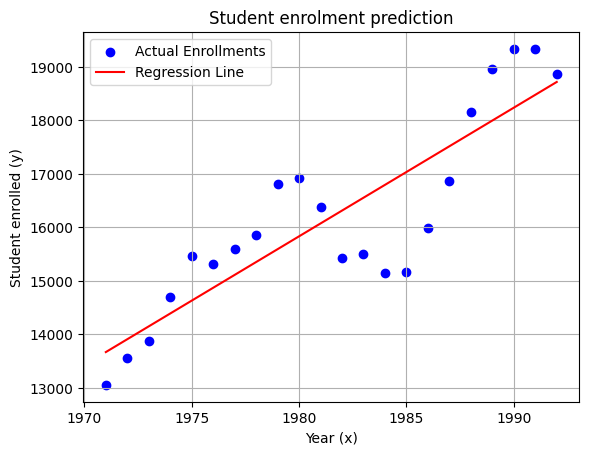

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'alabama.txt'
data = np.loadtxt(file, delimiter=' ')
years = data[:, 0]
enrollments = data[:, 1]

def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta_1 = np.sum((x-x_mean)* (y-y_mean)) / np.sum((x-x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0, beta_1

# Predict function
def predict(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

if __name__ == "__main__":
    # Fit the linear regression model
    beta_0, beta_1 = linear_regression(years, enrollments)

    # Prediction for 2050
    prediction_2050 = predict(2050, beta_0, beta_1)
    print(f"Predicted number of students in 2050: {prediction_2050:.0f}")

    # Plotting
    plt.scatter(with open(filename, 'r') as file:years, enrollments, color='blue', label='Actual Enrollments')
    plt.plot(years, predict(years, beta_0, beta_1), color='red', label='Regression Line')
    plt.xlabel('Year (x)')
    plt.ylabel('Student enrolled (y)')
    plt.title('Student enrolment prediction')
    plt.legend()
    plt.grid(True)
    plt.show()


Exercise 4 Task 2

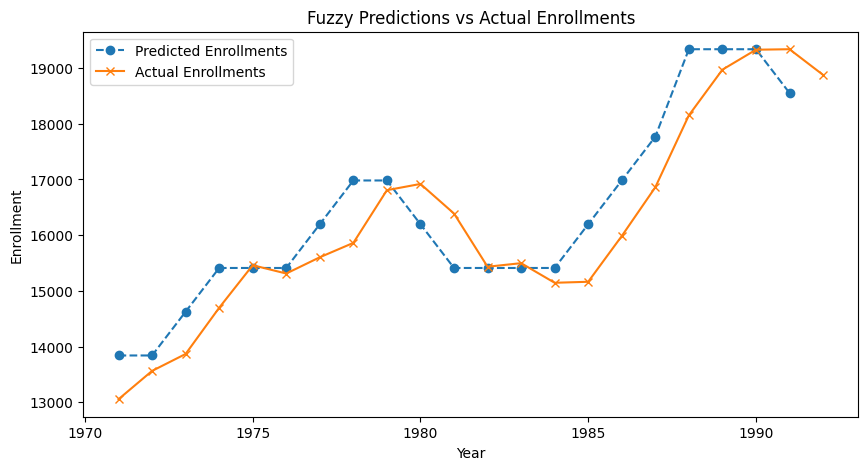

In [9]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'alabama.txt'
data = np.loadtxt(filename, delimiter=' ')
years = data[:, 0]
enrollments = data[:, 1]

# Define fuzzy sets
def triangular_fuzzy_sets(enrollments, n_sets):
    min_enrollment = np.min(enrollments)
    max_enrollment = np.max(enrollments)
    range_width = (max_enrollment - min_enrollment) / (n_sets - 1)
    fuzzy_sets = [(min_enrollment + i * range_width - range_width / 2,
                   min_enrollment + i * range_width,
                   min_enrollment + i * range_width + range_width / 2) for i in range(n_sets)]
    return fuzzy_sets

# Fuzzification
def fuzzify_enrollments(enrollments, fuzzy_sets):
    fuzzy_indices = []
    for enrollment in enrollments:
        memberships = [membership_value(enrollment, fs) for fs in fuzzy_sets]
        fuzzy_indices.append(np.argmax(memberships))
    return fuzzy_indices

# Calculate membership value
def membership_value(enrollment, fuzzy_set):
    left, center, right = fuzzy_set
    if left <= enrollment <= right:
        if enrollment <= center:
            return (enrollment - left) / (center - left)
        else:
            return (right - enrollment) / (right - center)
    return 0

# Prediction rules based on fuzzy sets
def predict_enrollments(fuzzy_indices, enrollments, fuzzy_sets):
    predictions = []
    for i in range(len(fuzzy_indices)-1):
        indices = [fuzzy_indices[i+1]]
        if len(indices) > 1:
            centroids = [(fuzzy_sets[idx][0] + fuzzy_sets[idx][2]) / 2 for idx in indices]
            predicted_value = np.mean(centroids)
        else:
            predicted_value = (fuzzy_sets[indices[0]][0] + fuzzy_sets[indices[0]][2]) / 2
        predictions.append(predicted_value)
    return predictions

# Testing different numbers of fuzzy sets
for n_sets in range(3, 10):
    fuzzy_sets = triangular_fuzzy_sets(enrollments, n_sets)
    fuzzy_indices = fuzzify_enrollments(enrollments, fuzzy_sets)
    predictions = predict_enrollments(fuzzy_indices, enrollments, fuzzy_sets)


# Plotting
plt.figure(figsize=(10, 5))
plt.plot(years[:-1], predictions, label='Predicted Enrollments', linestyle='--', marker='o')
plt.plot(years, enrollments, label='Actual Enrollments', marker='x')
plt.title('Fuzzy Predictions vs Actual Enrollments')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend()
plt.show()
